
keywords: numpy, scikit-learn, logistic regression, descente de gradient, optimisation.

# Detect hand-written digits with logistic regression and explore gradient descent  

## Description  
Mr Pontier is back and needs your help. This times, he needs to automatically detect hand-written digits written on pictures that represents the phone numbers of his clients and collaborators. Because he has thousands of documents, this will take far too long to do it manually. This is why he asked you if you can design an algorithm that automatically detect the number from the pictures.

Furthermore, Mr Pontier wants

* to understand how the algorithm works,
* to compare the performance with several classification algorithms
* to observe the convergence of a grandient descent algorithm for further investigation.

## Proposed Plan  
**1) Get and understand your data**

git clone the repository and run the given notebook in https://github.com/dtrckd/simplon_datai_2020.

### What is the type of the data ?¶
digits is an array of 1797 images or data instance

### How many pixel has one data instance ?
1 data instance or image has 64 pixels (columns of the array)

### What is the type of data of one pixel ? what does it represents ?
1 pixel is an integer in the range 0..16 which represents the grey level => This reduces dimensionality and gives invariance to small distortions

In [62]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


# Import some datab
digits = load_digits()

# Show dimensionality
print(digits.data.shape)

(1797, 64)


In [32]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [33]:
# what is the type of the data ?
# print(digits.DESCR)

print(digits.DESCR[:401])
print("_______________________________________________________________________________________")
print(" Data's keys : \n ", digits.keys())
print("_______________________________________________________________________________________")
print(" Data's shape : \n ", digits.data.shape)
print("_______________________________________________________________________________________")
print("Features Names : \n ", digits.feature_names[:5])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998
_______________________________________________________________________________________
 Data's keys : 
  dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
_______________________________________________________________________________________
 Data's shape : 
  (1797, 64)
_______________________________________________________________________________________
Features Names : 
  ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4']


### Real instance number is the value returned by digits.data.shape : 1797

<Figure size 432x288 with 0 Axes>

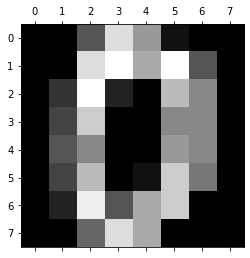

In [34]:
# Show one data

plt.gray() #  Greyed coloured
plt.matshow(digits.images[0]) 
plt.show() 

In [35]:
# Show several data for each label (== category) 

X = digits.images
Y = digits.target

#print(X, Y)
n_digits = np.unique(Y)
print("Values of Y : ", n_digits)

Values of Y :  [0 1 2 3 4 5 6 7 8 9]


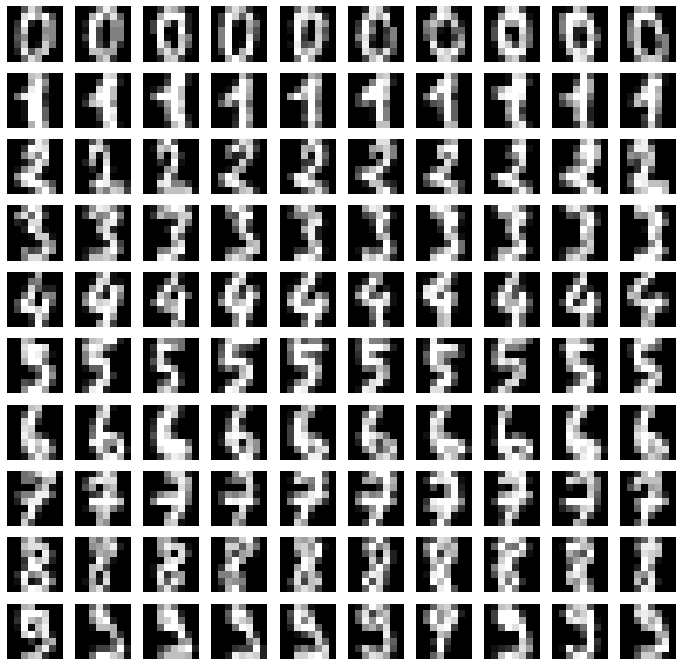

In [36]:
M = 10
dim = int(np.sqrt(X.shape[1]))

fig, axs = plt.subplots(len(n_digits), M, figsize=(12, 12))

for i, d in enumerate(n_digits):
    for j in range(M):
        axs[i,j].imshow(X[Y == d][j])
        axs[i,j].axis('off')

In [37]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Images Data Shape" , digits.data.shape)

Images Data Shape (1797, 64)


In [38]:
# Print to show there are 1797 labels (integers from 0–9)
print("Labels Data Shape", digits.target.shape)

Labels Data Shape (1797,)


In [39]:
print(list(digits.target))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 

In [40]:
size = 64
a = np.linspace(0, size-1, num=size)
print(a)
#a = a.reshape(np.sqrt(taille),np.sqrt(taille))
#print(a)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63.]


## 1) Get and understand your data

git clone the repository and run the given notebook in https://github.com/dtrckd/simplon_datai_2020/blob/master/brief_3/.

what is the type of the data ?

How many pixel has one data instance ?

What is the type of data of one pixel ? what does it represents ?

In [41]:
# How many pixel has one data instance ? (Attributes per Instance)
print("One Instance of #number of pic : ", digits.target.shape)
print("Each instance has pic of 8x8 pixels per instance")

One Instance of #number of pic :  (1797,)
Each instance has pic of 8x8 pixels per instance


In [42]:
# What is the type of data of one pixel ? what does it represents ?
#np.unique(digits.data.ravel())
print("These values represents the color for a pixel in an array", np.unique(digits.data))

These values represents the color for a pixel in an array [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]


In [43]:
# Data type of digits
digits.data.dtype

dtype('float64')

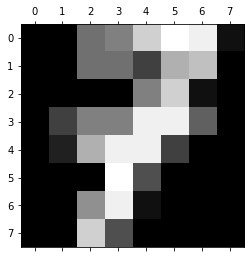

In [44]:
# Show one data
val = 7
plt.matshow(digits.images[val])

In [45]:
print("Number :", digits.target[val])
print("Matrix :\n", digits.images[val]) 

Number : 7
Matrix :
 [[ 0.  0.  7.  8. 13. 16. 15.  1.]
 [ 0.  0.  7.  7.  4. 11. 12.  0.]
 [ 0.  0.  0.  0.  8. 13.  1.  0.]
 [ 0.  4.  8.  8. 15. 15.  6.  0.]
 [ 0.  2. 11. 15. 15.  4.  0.  0.]
 [ 0.  0.  0. 16.  5.  0.  0.  0.]
 [ 0.  0.  9. 15.  1.  0.  0.  0.]
 [ 0.  0. 13.  5.  0.  0.  0.  0.]]


In [46]:
# min_val => Black
# max_val => White

## 2) Prepare your ML algorithm

Veille How to evaluate classification algorithms ?

https://scikit-learn.org
wikipedia
towards data science
...
Questions

Write the equation of the precision and recall score and explicit what each terms represents.
explain the purpose of the training set ?
explain the prpose of the testing set ?
What does the train_test_split function in sklearn do ?

use the train_test_split function of sklearn to build a test set with size that represents 20% of the original dataset (and 80% for the training set).

check that the ratio is correct.

In [47]:
#np.linspace?
digits.target[:30]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9])

How to evaluate classification algorithms ?

* #### Write the equation of the precision and recall score and explicit what each terms represents.
https://fr.wikipedia.org/wiki/Pr%C3%A9cision_et_rappel

Precision-Recall is a useful measure of success of prediction when the classes are very imbalanced. In information retrieval, precision is a measure of result relevancy, while recall is a measure of how many truly relevant results are returned.
The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).
Precision is appropriate when minimizing false positives is the focus
Recall is appropriate when minimizing false negatives is the focus

**Precision** : ```P = Tp / (Tp + Fp) It's the ratio between True Positives over (Tpos + False positives)```

**Recall** : ```R = Tp / (Tp + Fn) the ratio between True Positives over (Tp + False negatives)```

* #### Explain the purpose of the training set ?

```A training dataset is a dataset of examples used during the learning process and is used to fit the parameters (e.g., weights) of, for example, a classifier.```

The portion used for fitting the model.  
The remainder is used for empirical validation.

* #### Explain the purpose of the testing set ? 
```
A test dataset is a dataset that is independent of the training dataset, but that follows the same probability distribution as the training dataset. If a model fit to the training dataset also fits the test dataset well, minimal overfitting has taken place. A better fitting of the training dataset as opposed to the test dataset usually points to overfitting.```  
  
```A test set is therefore a set of examples used only to assess the performance (i.e. generalization) of a fully specified classifier.```  

```The basic benefits of randomization are as follows: it eliminates the selection bias, balances the groups with respect to many known and unknown confounding or pronostic variables, and forms the basis for statistical tests, a basis for an assumption of free statistical test of the equality of treatments.```

TS give a final honest estimate of generalization. 
Consequently, cases in the test set must be treated just as new data would be treated. 
They cannot be involved in the determination of the fitted prediction model.

* #### What does the train_test_split function in sklearn do ?

```The train_test_split function is a quick utility that wraps input validation and next(ShuffleSplit().split(X, y)) and application to input data into a single call for splitting (and optionally subsampling) data in a oneliner. Allowed inputs are lists, numpy arrays, scipy-sparse matrices or pandas dataframes.```


```Use the train_test_split function of sklearn to build a test set with size that represents 20% of the original dataset (and 80% for the training set).```


Check the ratio is correct

sur-apprentissage(overfitting) et sous-apprentissage

## 3) Predict Digits  

In the dataset we have multiple labels. Therefore, to start we will predict in a binary case. It means that that we will predict only if an image is a given digit (for exemple `7`) or not.

To do so, we will a **logistic regression** algorithm plus (at least) **two** others of your choices. 

Fit the model and show the performance results whithin a table for each models in terms of:
* the **precision** score on the testing set 
* the **recall** score on the testing set
* the inference time for each algorithm

How many input data the algorithms needs the be efficient (and why) ? 

Compare the performance on the training set. What do you observe ?

* ### Logistic Regression

## Number : 7

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0)                                                   
from sklearn.linear_model import LogisticRegression
logitReg = LogisticRegression(solver='liblinear')

logitReg.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [49]:
# Number : 7

# y_train[y_train != 7] = 0
# y_test[y_test != 7] = 0
# y_train[y_train == 7] = 1
# y_test[y_test == 7] = 1


y_train7 = np.array([1 if y_train[i] == 7 else 0 for i in range(len(y_train))])
y_test7 = np.array([1 if y_test[i] == 7 else 0 for i in range(len(y_test))])

print(y_train[:30])
print(y_train7[:30])

[6 5 3 4 4 4 8 8 7 0 9 6 3 5 2 3 0 8 3 3 1 3 3 0 0 4 6 0 7 7]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]


In [50]:
#x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0)
#logitReg.fit(x_train, y_train)
logitReg = LogisticRegression(solver='liblinear')
logitReg.fit(x_train, y_train7)

LogisticRegression(solver='liblinear')

In [72]:
#logitReg.predict(x_test[0].reshape(1,-1))
ypred7 = logitReg.predict(x_test)

In [73]:
#logitReg.predict(x_test[0:10])
print(y_test[:30])
print(y_test7[:30])
print(ypred7[:30])
# Same values!

[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0]


In [74]:
score7 = logitReg.score(x_test, y_test7)
print(round(score7*100, 2), "% de reconnaissance du chiffre 7")

99.17 % de reconnaissance du chiffre 7


* ### SVM

In [75]:
from sklearn import svm
SVM8 = svm.SVC()

## Fit + predict
SVM8.fit(x_train, y_train7)
ypredSVM8 = SVM8.predict(x_test)

* ## KNN 

In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [88]:
knn=KNeighborsClassifier(n_neighbors=30)
#On entraîne le modèle :
knn.fit(x_train, y_train)
ypredKNN8=knn.predict(x_test)

In [89]:
#Evaluer le modèle en utilisant le taux d'erreur :
err_test30=np.sum(y_test != ypredKNN8)/len(y_test)

In [90]:
#Evaluer le modèle en utilisant le score :
knn_score = knn.score(x_test, y_test)
print(round(knn.score(x_test, y_test), 2)*100, "%")

96.0 %


In [91]:
#Matrice de confusion :
matrix_confusion = confusion_matrix(y_test, ypredKNN8)
print(matrix_confusion)

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 1  0 32  1  0  0  0  1  1  0]
 [ 0  0  1 28  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  0  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  3  0  1  0  0  1  1 33  0]
 [ 0  0  0  0  0  1  0  1  0 39]]


In [92]:
plt.figure(figsize=(10,10))
sns.heatmap(confusionMatrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'YlGnBu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0} %'.format(round(knn_score*100, 2))
plt.title(all_sample_title, size = 15);

NameError: name 'sns' is not defined

<Figure size 720x720 with 0 Axes>

* ### SGD (Stochastic Gradient Descent)

In [93]:
from sklearn.linear_model import SGDClassifier

sgd8 = SGDClassifier()
sgd8.fit(x_train, y_train7)
ypredSGD8 = sgd8.predict(x_test)

* ### DTC (Decision Tree Classifier)


In [94]:
from sklearn.tree import DecisionTreeClassifier
dtc8 = DecisionTreeClassifier()
dtc8.fit(x_train, y_train7)
ypredDTC8 = dtc8.predict(x_test)

In [95]:
print('---------------------Reg Log-------------------------')
print(classification_report(y_test7, ypred7))
print('-----------------------SVM---------------------------')
print(classification_report(y_test7, ypredSVM8))
print('-----------------------KNN---------------------------')
print(classification_report(y_test7, ypredKNN8))
print('-----------------------SGD---------------------------')
print(classification_report(y_test7, ypredSGD8))
print('-----------------------DTC---------------------------')
print(classification_report(y_test7, ypredDTC8))

---------------------Reg Log-------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       321
           1       0.97      0.95      0.96        39

    accuracy                           0.99       360
   macro avg       0.98      0.97      0.98       360
weighted avg       0.99      0.99      0.99       360

-----------------------SVM---------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       321
           1       1.00      0.97      0.99        39

    accuracy                           1.00       360
   macro avg       1.00      0.99      0.99       360
weighted avg       1.00      1.00      1.00       360

-----------------------KNN---------------------------
              precision    recall  f1-score   support

           0       1.00      0.09      0.16       321
           1       0.00      0.00      0.00        39
           2       0.

/home/dan/anaconda3/envs/dataviz/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 4) Multi-class classification**

Fit now the algorit
hm in the multiclass case (ie using all the classes (target)).

Show the result with
* the confusion matrix (see sklearn.metrics.plot_confusion_matrix)
* the classification report (see sklearn.metrics.classification_report)


#### a) Splitting data into subsets 'train' & 'test' to train algo

In [200]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0)

#testing set is equal to (100*x_test.shape)/(digits.data.shape) => 20% (test_size)

#### b) Importing LogReg

In [201]:
from sklearn.linear_model import LogisticRegression

#### c) logitReg is an instance#### Splitting data into subsets 'train' & 'test' to train algo

In [202]:
logitReg = LogisticRegression(solver='liblinear')

#### d) Training model with data (Discovering the relation between X and Y)


In [203]:
logitReg.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

#### e) Predict labels for new images


In [204]:
logitReg.predict(x_test[0].reshape(1,-1))

array([2])

#### f) Predict for every image predictions

In [205]:
logitReg.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

#### g) Predictions on all test data subset

In [206]:
pred = logitReg.predict(x_test)
print( "Size", pred.shape)
print( "Array :", pred)

Size (360,)
Array : [2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 8 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 5 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 4 7 4 8 5 8 5 5 2 5 9 0 7 1 4 1 3
 4 8 9 7 9 8 2 1 5 2 5 8 4 1 7 0 6 1 5 5 9 9 5 9 9 5 7 5 6 2 8 6 9 6 1 5 1
 5 9 8 1 5 3 6 1 8 9 8 7 6 7 6 5 6 0 8 8 9 8 6 1 0 4 1 6 3 8 6 7 4 9 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 1 9 6 4 5 0 1 4 6 4 3 3 0 9 5 3 2 8 4 2 1 6 9 9 2 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 3 2 0 7 6 1 1 9 7 2 7 8 5 5 7 5 3 3 7 2 7 5 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 2 6 8 8 8 4 6 7 5 2 4 5 3 2 4 6 9 4 5 4 3
 4 6 2 9 0 6 7 2 0 9 6 0 4 2 0 7 8 8 5 4 8 2 8 4 3 7 2 6 9 1 5 1 0 8 2 8 9
 5 6 2 2 7 2 1 5 1 6 4 5 0 9 4 1 1 7 0 8 9 0 5 4 3 8 8]


In [207]:
score = logitReg.score(x_test, y_test)
print("Accuracy :", round(score*100, 2), "%")

Accuracy : 95.0 %


In [208]:
#Perf of dataset

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

confusionMatrix = metrics.confusion_matrix(y_test, pred)
print(confusionMatrix)

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  1  0  3  0]
 [ 0  0 34  2  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  1  0  0  1  0  0 37  0  0]
 [ 0  2  1  0  0  0  0  0 35  1]
 [ 0  0  0  1  0  1  0  0  2 37]]


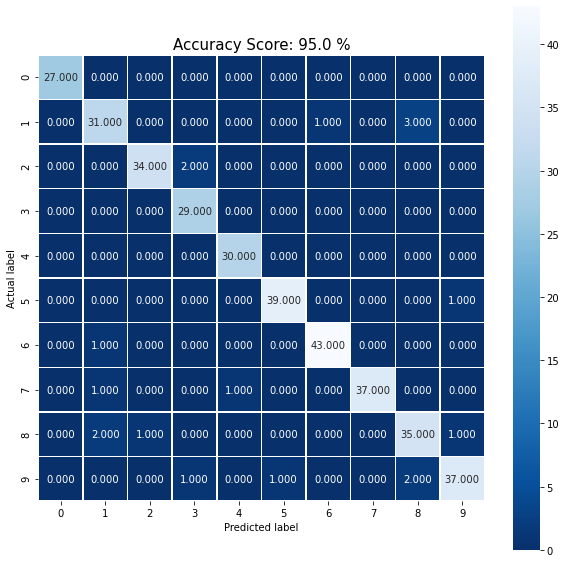

In [302]:
plt.figure(figsize=(10,10))
sns.heatmap(confusionMatrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0} %'.format(round(score*100, 2))
plt.title(all_sample_title, size = 15);

In [210]:
# Precision
# Recall

print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.89      0.89      0.89        35
           2       0.97      0.94      0.96        36
           3       0.91      1.00      0.95        29
           4       0.97      1.00      0.98        30
           5       0.97      0.97      0.97        40
           6       0.98      0.98      0.98        44
           7       1.00      0.95      0.97        39
           8       0.88      0.90      0.89        39
           9       0.95      0.90      0.92        41

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



Etudions les critères d'évaluation du modèle de regression logistique

**On parle de** :

* vrais positifs (VP): individus qui ont été classés positifs et qui le sont réellement;
* faux positifs (FP): classés positifs alors qu’ils sont négatifs;
* vrai négatifs (VN): individus qui ont été classés négatifs et qui le sont réellement;
* faux négatifs (FN): classés négatifs alors qu’ils sont positifs.

**Les critères** :

* Taux d’erreur : nombre de mauvais classement rapporté à l’effectif total
* Taux de succès : probabilité de bon classement du modèle (accuracy)
* Sensibilité (ou taux de vrai positif) : capacité du modèle à retrouver les positifs (rappel pour le 1)
* Précision : proportion de vrais positifs parmi les individus classés positifs (précision pour le 1)
* Spécificité (ou taux de vrai négatif) : proportion de négatifs détectés (rappel pour le 0)
* Le taux de faux positifs (TFP) : proportion de négatifs qui ont été classés positifs (précision pour le 0)

In [96]:
#for x in range(10):
#    np.array([1 if y_train[i] == x else 0 for i in range(len(y_train))])

## 5) Gradient descent ?  

We want to observe the convergence of the performance.
To do so, we want to implement our own version of the Logistic regression inference algorithm.

> veille
What algorithm uses sklearn to estimate the model parameters for the logistic regression ?
* What are the keys equations we need to implement the algorithm ?
* what is the difference between the gradient descent and the stochastic gradient descent ?

Write the *pseudo-code* of the algorithm to be sure to understand all the different steps.
https://fr.wikipedia.org/wiki/Pseudo-code

Implement the gradient descent for the logistic regression.


Show the convergence of the performance results with two graphics:
* the **precision** score on testing set AND training set 
* the **recall** score on testing set AND training set 


What is the impact of the learning rate on the convergence ?
What difference do you observe on the results between the training set and testing set
